In [256]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.


### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [19]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [3]:
driver.get('https://www.amazon.in/')

In [4]:
driver.find_element_by_id('twotabsearchtextbox').send_keys('iPhone')

In [5]:
driver.find_element_by_id('nav-search-submit-text').click()

In [6]:
brand_name = []
phone_name = []
Exchange = []
Replacement = []
Available = []
Delivery = []
URL = []

for a in range(0,3): 
    phone_links = driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a')
    for i in phone_links:
        i.click()
        time.sleep(2)
    for i in range(1,len(phone_links)+1):
        time.sleep(2)
        driver.switch_to.window(driver.window_handles[i])
        brand_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text.split(' ')[0]
        try:
            phone_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text.split('Apple')[1]
        except:
            phone_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text
        try:
            exchange = driver.find_element_by_xpath("//div[@class='a-section a-spacing-none sopp-offer-container']").text
        except NoSuchElementException:
            exchange = '-'
        try:
            replacement = driver.find_element_by_id("productSupportAndReturnPolicy-return-policy-anchor-text").text
        except NoSuchElementException:
            replacement = driver.find_element_by_xpath('//a[@class="a-size-small a-link-normal a-text-normal"]').text
        try:
            delivery = driver.find_element_by_id('mir-layout-DELIVERY_BLOCK-slot-DELIVERY_MESSAGE').text.strip(' ').split(':')[1].strip('Details').strip()
        except NoSuchElementException:
            delivery = '-'
        try:
            available = driver.find_element_by_xpath('//div[@class="a-section a-spacing-small a-text-center"]/span').text
        except NoSuchElementException:
            available = 'Available'
            
        url = driver.current_url
        phone_name.append(phone_names)
        brand_name.append(brand_names)
        Exchange.append(exchange)
        Replacement.append(replacement)
        Available.append(available)
        Delivery.append(delivery)
        URL.append(url)
    for i in range(1,len(phone_links)+1):
        driver.switch_to.window(driver.window_handles[1])
        driver.close()
        
        
    driver.switch_to.window(driver.window_handles[0])
    time.sleep(2)
    try:
        driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-button"]').click()
    except ElementClickInterceptedException:
        driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]').click()
    time.sleep(5)

In [18]:
Amazon_Phone_Details = pd.DataFrame()
Amazon_Phone_Details['Brand Name'] = brand_name
Amazon_Phone_Details['Phone Name'] = phone_name
Amazon_Phone_Details['Availabality'] = available
Amazon_Phone_Details['Exchange Offer'] = Exchange
Amazon_Phone_Details['Replacement'] = Replacement
Amazon_Phone_Details['Expected Delivery'] = Delivery
Amazon_Phone_Details['URL'] = URL
Amazon_Phone_Details

,Brand Name,Phone Name,Availabality,Exchange Offer,Replacement,Expected Delivery,URL
0,Apple,iPhone 13 Pro (128 GB) - Alpine Green,Available,Bank Offer (2): Flat INR 3000 Instant D…See All,7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-13-Pro-128/...
1,5s,5s Silver Compatible with iPhone with 8 Mega P...,Available,Bank Offer (4): 10% Instant Discount upto Rs.1...,7 Days Replacement,"Friday, May 27",https://www.amazon.in/Silver-Compatible-iPhone...
2,Apple,iPhone 13 (256GB) - Blue,Available,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-13-256GB-Bl...
3,Apple,iPhone 12 (64GB) - Blue,Available,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,"Thursday, May 26",https://www.amazon.in/New-Apple-iPhone-12-64GB...
4,Apple,iPhone 13 Pro Max (256GB) - Sierra Blue,Available,Bank Offer (2): Flat INR 3000 Instant D…See All,7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-Pro-Max-256...
5,Apple,iPhone 12 (128GB) - White,Available,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,"Tuesday, May 24",https://www.amazon.in/New-Apple-iPhone-12-128G...
6,Apple,iPhone 13 (128GB) - Starlight,Available,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-13-128GB-St...
7,Apple,iPhone 13 (128GB) - Pink,Available,"Exchange Offer: Up to ₹11,150.00 off on Exchange",7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-13-128GB-Pi...
8,Apple,iPhone 13 (128GB) - Blue,Available,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,"Tuesday, May 24",https://www.amazon.in/Apple-iPhone-13-128GB-Bl...
9,6G,6G Space Grey Compatible with iPhone with 8 Me...,Available,Bank Offer (4): 10% Instant Discount upto Rs.1...,7 Days Replacement,"Friday, May 27",https://www.amazon.in/6G-Compatible-iPhone-Cam...


In [8]:
driver.quit()

### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [155]:
def Google_images(Item_to_Search):
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    driver.get('https://images.google.com/')
    driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input').send_keys(Item_to_Search)
    driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input').send_keys(Keys.ENTER)
    for i in range(1, 11):
        Path = driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div[' +str(i) + ']/a[1]/div[1]/img')
        time.sleep(2)
        Path.screenshot(Item_to_Search + ' (' + str(i) + ').png')
    driver.close()

In [156]:
Google_images('Fruits')

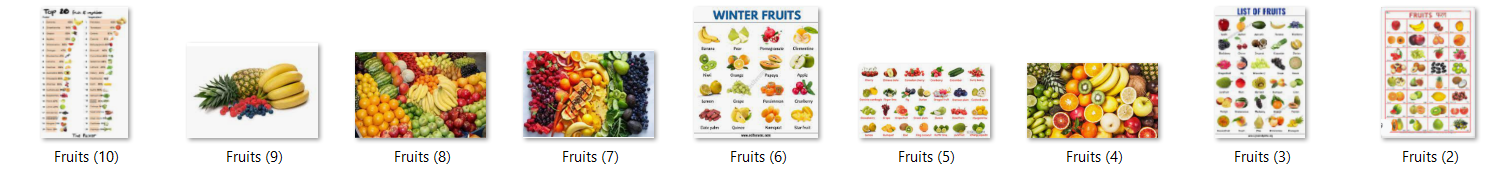
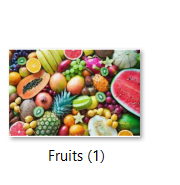

In [157]:
Google_images('Cars and Machine Learning')

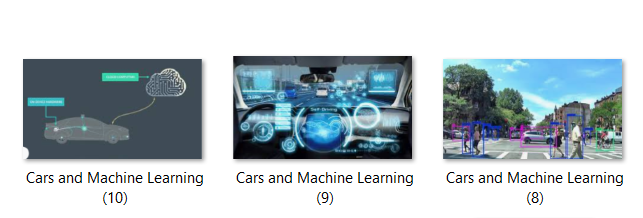
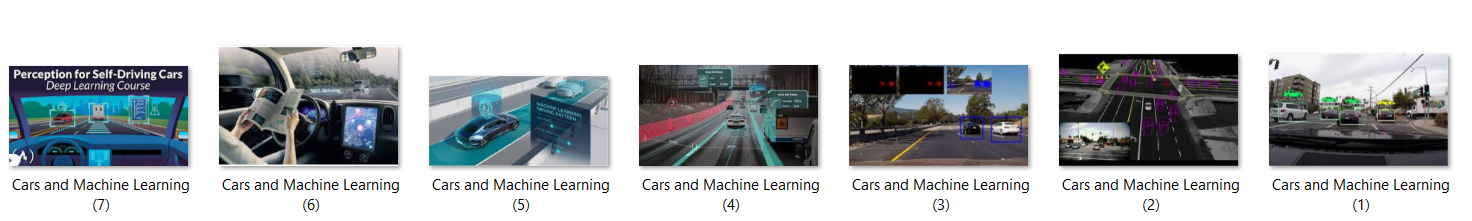

In [158]:
Google_images('Guitar')

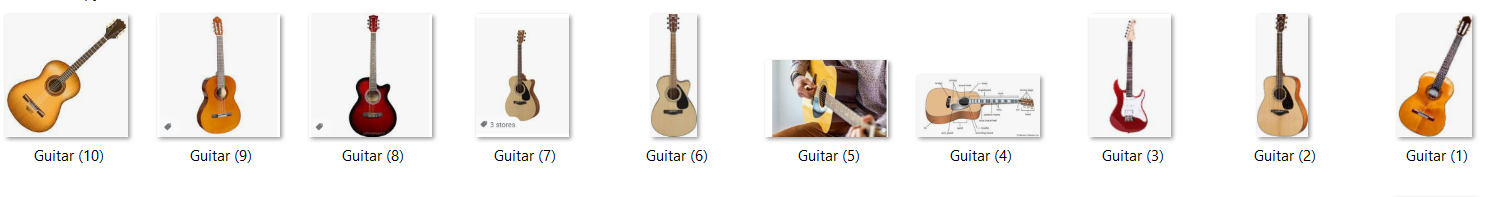

In [159]:
Google_images('Cakes')

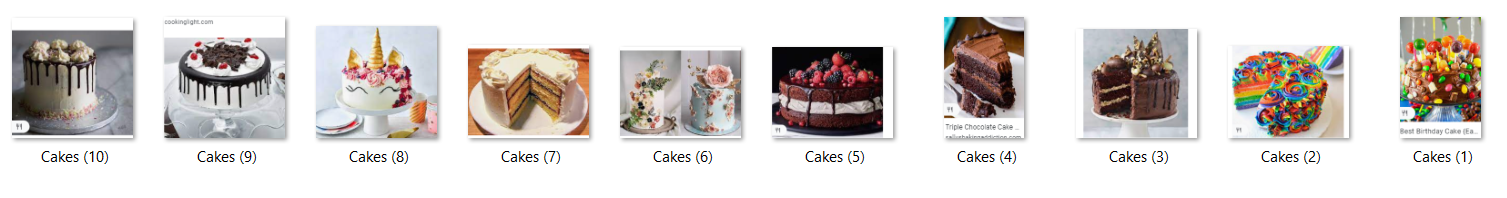

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [465]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [466]:
driver.get('https://www.flipkart.com/')

In [467]:
driver.find_element_by_xpath('/html/body/div[2]/div/div/button').click()

In [468]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input').send_keys('samsung f22')

In [469]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button').click()

In [470]:
time.sleep(5)
details = driver.find_elements_by_xpath('//div[@class="col col-7-12"]')
details

[<selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="60578a51-9a69-4be3-b75c-71e8ad18fa19")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="a5c326aa-62eb-47e5-a62b-35d15f2b9d1d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="e8abb7b1-a563-478c-acc0-6c8b0d961abb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="3271a983-7108-41d2-b990-ef891a7aa01e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="4c5b68c3-166c-4ac0-aca8-bfa133a2882a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="68151bf0-d54d-4e73-a723-6821e568c12e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="015510498fd2a9ba2bcecee22ad28e16", element="e9284355-3ba1-48a9-a017-35

In [471]:
Brand_Name = []
Smartphone_Name = [] 
Color = []
RAM = []
ROM = []
Primary_Camera = []
Secondary_Camera = []
Display_Size = []
Battery_Capacity = []
Price = []
Product_URL = []
for i in details:
    brand_name = i.text.split(' ')[0]
    Brand_Name.append(brand_name)
    phone_name = i.text.split('(')[0].split('SAMSUNG')
    Smartphone_Name.append(phone_name)
    color = i.text.split('(')[1].split(',')[0]
    Color.append(color)
    rom = i.text.split(' | ')[1].split(' ROM')[0]
    ROM.append(rom)

details = driver.find_elements_by_xpath('//div[@class="fMghEO"]/ul[1]/li[1]')
for i in details:
    ram = i.text.split(' ')[0]
    RAM.append(ram)
details = driver.find_elements_by_xpath('//div[@class="fMghEO"]/ul[1]/li[3]')
for i in details:
    try:
        primary_camera = i.text.split(' | ')[1]
        Primary_Camera.append(primary_camera)
    except:
        primary_camera = '-'
        Primary_Camera.append(primary_camera)
details = driver.find_elements_by_xpath('//div[@class="fMghEO"]/ul[1]/li[3]')
for i in details:
    secondary_camera = i.text.split(' | ')[0]
    Secondary_Camera.append(secondary_camera)
details = driver.find_elements_by_xpath('//div[@class="fMghEO"]/ul[1]/li[2]')
for i in details:
    display = i.text.split(' Display')[0]
    Display_Size.append(display)
details = driver.find_elements_by_xpath('//div[@class="fMghEO"]/ul[1]/li[4]')
for i in details:
    battery = i.text.split(' Battery')[0]
    Battery_Capacity.append(battery)
details = driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')
for i in details:
    price = i.text.strip('₹')
    Price.append(price)
details = driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for i in details:
    url = i.get_attribute('href')
    Product_URL.append(url)

In [472]:
Flipkart_details = pd.DataFrame()
Flipkart_details['Brand_Name'] = Brand_Name
Flipkart_details['Smartphone_Name'] = Smartphone_Name
Flipkart_details['Color'] = Color
Flipkart_details['RAM'] = RAM
Flipkart_details['ROM'] = ROM 
Flipkart_details['Primary_Camera'] = Primary_Camera
Flipkart_details['Secondary_Camera'] = Secondary_Camera
Flipkart_details['Display_Size'] = Display_Size
Flipkart_details['Battery_Capacity'] = Battery_Capacity
Flipkart_details['Price'] = Price
Flipkart_details['Product_URL'] = Product_URL
Flipkart_details

,Brand_Name,Smartphone_Name,Color,RAM,ROM,Primary_Camera,Secondary_Camera,Display_Size,Battery_Capacity,Price,Product_URL
0,SAMSUNG,"[, Galaxy F22 ]",Denim Blue,4,64 GB,13MP Front Camera,48MP + 8MP + 2MP + 2MP,16.26 cm (6.4 inch) HD+,6000 mAh Lithium-ion,"11,999",https://www.flipkart.com/samsung-galaxy-f22-de...
1,SAMSUNG,"[, Galaxy F22 ]",Denim Blue,6,128 GB,13MP Front Camera,48MP + 8MP + 2MP + 2MP,16.26 cm (6.4 inch) HD+,6000 mAh Lithium-ion,"13,999",https://www.flipkart.com/samsung-galaxy-f22-de...
2,SAMSUNG,"[, Galaxy F22 ]",Denim Black,4,64 GB,13MP Front Camera,48MP + 8MP + 2MP + 2MP,16.26 cm (6.4 inch) HD+,6000 mAh Lithium-ion,"11,999",https://www.flipkart.com/samsung-galaxy-f22-de...
3,SAMSUNG,"[, Galaxy F22 ]",Denim Black,6,128 GB,13MP Front Camera,48MP + 8MP + 2MP + 2MP,16.26 cm (6.4 inch) HD+,6000 mAh Lithium-ion,"13,999",https://www.flipkart.com/samsung-galaxy-f22-de...
4,SAMSUNG,"[, Galaxy F23 5G ]",Aqua Blue,6,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"16,999",https://www.flipkart.com/samsung-galaxy-f23-5g...
5,SAMSUNG,"[, Galaxy F23 5G ]",Copper Blush,6,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"16,999",https://www.flipkart.com/samsung-galaxy-f23-5g...
6,SAMSUNG,"[, Galaxy F23 5G ]",Forest Green,6,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"16,999",https://www.flipkart.com/samsung-galaxy-f23-5g...
7,SAMSUNG,"[, Galaxy F23 5G ]",Aqua Blue,4,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"15,999",https://www.flipkart.com/samsung-galaxy-f23-5g...
8,SAMSUNG,"[, Galaxy F23 5G ]",Copper Blush,4,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"15,999",https://www.flipkart.com/samsung-galaxy-f23-5g...
9,SAMSUNG,"[, Galaxy F23 5G ]",Forest Green,4,128 GB,8MP Front Camera,50MP + 8MP + 2MP,16.76 cm (6.6 inch) Full HD+,5000 mAh Lithium Ion,"15,999",https://www.flipkart.com/samsung-galaxy-f23-5g...


In [473]:
driver.close()

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [21]:
def city_coordinates(City):
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    wait = WebDriverWait(driver, 10)
    driver.get("https://www.google.com/maps")
    driver.find_element_by_xpath('//*[@id="searchboxinput"]').send_keys(City)
    driver.find_element_by_xpath('//*[@id="searchbox-searchbutton"]').click()
    time.sleep(3)
    latitude = driver.current_url.split('/@')[1].split(',')[0]
    longitude = driver.current_url.split('/@')[1].split(',')[1]
    print(City,': Latitude = ',latitude,', Longitude =',longitude)
    driver.close()

In [22]:
city_coordinates('Frankfurt')

Frankfurt : Latitude =  50.1211277 , Longitude = 8.49648


### 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [41]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [42]:
driver.get('https://trak.in/')

In [45]:
driver.wait(10)
driver.find_element_by_xpath('/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a').click()

In [46]:
Date = []

date = driver.find_elements_by_xpath('//td[@class="column-2"]')
for i in date:
    d = i.text
    Date.append(d)
Date = Date[5:29]
Date

['04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021']

In [47]:
Startup_Name = []

stup = driver.find_elements_by_xpath('//td[@class="column-3"]/a[1]')
for i in stup:
    s = i.text
    Startup_Name.append(s)
Startup_Name = Startup_Name[5:29]
Startup_Name

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [48]:
Industry = []

x = driver.find_elements_by_xpath('//td[@class="column-4"]')
for i in x:
    industry = i.text
    Industry.append(industry)
Industry = Industry[5:29]
Industry

['E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce']

In [49]:
Sub_Vertical = []

x = driver.find_elements_by_xpath('//td[@class="column-5"]')
for i in x:
    sub = i.text
    Sub_Vertical.append(sub)
Sub_Vertical = Sub_Vertical[5:29]
Sub_Vertical

['Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies']

In [55]:
City = []

x = driver.find_elements_by_xpath('//td[@class="column-6"]')
for i in x:
    c = i.text
    City.append(c)
City = City[5:29]
City

['Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru']

In [56]:
Invester_Name = []
x = driver.find_elements_by_xpath('//td[@class="column-7"]')
for i in x:
    invester = i.text
    Invester_Name.append(invester)
Invester_Name = Invester_Name[5:29]
Invester_Name

['Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others']

In [57]:
Investment_Type = []
x = driver.find_elements_by_xpath('//td[@class="column-8"]')
for i in x:
    investment = i.text
    Investment_Type.append(investment)
Investment_Type = Investment_Type[5:29]
Investment_Type

['Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed']

In [58]:
Amount = []
x = driver.find_elements_by_xpath('//td[@class="column-9"]')
for i in x:
    amount = i.text
    Amount.append(amount)
Amount = Amount[5:29]
Amount

['250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000']

In [59]:
Trak = pd.DataFrame()
Trak['Date'] = Date
Trak['Startup Name'] = Startup_Name
Trak['Industry']=Industry
Trak['Sub_Vertical'] = Sub_Vertical
Trak['City'] = City
Trak['Invester_Name'] = Invester_Name
Trak['Investment Type'] = Investment_Type
Trak['Amount'] = Amount
Trak

,Date,Startup Name,Industry,Sub_Vertical,City,Invester_Name,Investment Type,Amount
0,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


### 7. Write a program to scrap all the available details of best gaming laptops from digit.in

In [61]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [62]:
driver.get('https://www.digit.in/')

In [63]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/ul/li[3]/a').click()

In [69]:
driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a').click()

In [142]:
x = driver.find_elements_by_xpath('//div[@class="right-container"]/div/a')
Names = []
for i in x:
    names = i.text
    Names.append(names)

In [90]:
OS =[]
Display = []
Processor = []
Memory = []
x = driver.find_elements_by_xpath('//div[@class="product-detail"]')
for i in x:
    os = i.text.split('\n')[1]
    OS.append(os)
    display = i.text.split('\n')[3]
    Display.append(display)
    processor = i.text.split('\n')[5]
    Processor.append(processor)
    memory = i.text.split('\n')[7]
    Memory.append(memory)

In [130]:
Weight = []
x =driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[7]')
for i in x:
    weight = i.text.strip('Weight : ')
    Weight.append(weight)

In [128]:
Dimensions = []
x =driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[8]')
for i in x:
    dimension = i.text.strip('Dimension : ')
    Dimensions.append(dimension)

In [129]:
Graphic_Processor = []
x =driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[9]')
for i in x:
    graphic = i.text.strip('Dimension : ')
    Graphic_Processor.append(graphic)

In [151]:
x = driver.find_elements_by_xpath('//div[@class="Top10-Seller"]/table/tbody/tr')
Price = []
for i in x:
    price = i.text.split('₹ ')[1]
    Price.append(price)

In [152]:
Digit = pd.DataFrame()
Digit['Name'] = Names
Digit['OS'] = OS
Digit['Display'] = Display
Digit['Processor'] = Processor
Digit['Memory'] = Memory
Digit['Weight'] = Weight
Digit['Dimensions'] = Dimensions
Digit['Graphic Processor'] = Graphic_Processor
Digit['Price'] = Price
Digit

,Name,OS,Display,Processor,Memory,Weight,Dimensions,Graphic Processor,Price
0,MSI RAIDER GE76,WINDOWS 11 HOME,"17"" (3840 X 2160)",12TH GEN INTEL CORE I9-12900HK | 5 GHZ,2 TB SSD/16 GBGB DDR5,2.9,397 x 284 x 26,Graphics Processor : NVIDIA GeForce RTX 3080T,"429,940"
1,ASUS ROG STRIX SCAR 15,WINDOWS 11 HOME,"15.6"" (2560 X 1440)",12TH GEN INTEL CORE I9-12900H | 2.5 GHZ,2 TB SSD/32 GBGB DDR5,2.3,259 x 354 x 27,Graphics Processor : NVIDIA GeForce RTX 3070 T,"285,390"
2,ACER NITRO 5,WINDOWS 10,"15.6"" (1920 X 1080)",AMD RYZEN 9 OCTA CORE | 2.4 GHZ,1 TB HDD/16 GBGB DDR4,2.4,363.4 x 255 x 23.9,Graphics Processor : NVIDIA GeForce RTX 3070,"129,990"
3,MSI STEALTH 15M,WINDOWS 10,"15.6"" (1920 X 1080)",INTEL CORE I7 11TH GEN - 11375H | NA,1 TB SSD/16 GBGB DDR4,1.7,358.3 x 248 x 16.15,Graphics Processor : NVIDIA GeForce RTX 3060,"134,990"
4,ASUS ROG STRIX SCAR 15,WINDOWS 10,"15.6"" (2560 X 1440)",AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ,2 TB SSD/32 GBGB DDR4,2.30,354 x 259 x 22.6,Graphics Processor : NVIDIA GeForce RTX 3080,"193,990"
5,ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,Graphics Processor : NVIDIA® GeForce RTX™ 3070,"215,990"
6,ASUS ZEPHYRUS G14,WINDOWS 10 HOME,"14"" (1920 X 1080)",AMD 3RD GEN RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,Graphics Processor : NVIDIA GeForce RTX 2060,"144,990"
7,HP OMEN 16,WINDOWS 11 HOME,"16.1"" (1920 X 1080)",12TH GEN INTEL CORE I7-12700H | 4.7 GHZ,1 TB SSD/16 GBGB DDR4,2.32,36.92 x 24.8 x 2.3,Graphics Processor : NVIDIA GeForce RTX 3060,"139,990"
8,ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,Graphics Processor : NVIDIA GeForce RTX 2070 M...,"185,000"
9,ACER ASPIRE 7 GAMING LAPTOP,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,Graphics Processor : NVIDIA® GeForce® GTX 1650,"53,490"


### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.


In [288]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [289]:
driver.get('https://www.forbes.com/?sh=37abc3d02254')
time.sleep(10)

In [294]:
driver.execute_script("window.scrollTo(0, window.scrollY + 1000)")

In [295]:
try:
    driver.find_element_by_xpath('/html/body/div[1]/main/section[8]/div[2]/div/div[2]/div[1]/a[2]').click()
except NoSuchElementException:
    driver.wait(10)
    /html/body/div[1]/main/section[8]/div[2]/div/div[2]/div[1]/a[2].click()

In [160]:
Rank = []

rank = driver.find_elements_by_xpath("//div[@class='rank']")

for i in rank:
    r = i.text
    Rank.append(r)

In [305]:
Name = []

name = driver.find_elements_by_xpath("//div[@class='personName']/div")

for i in name:
    n = i.text
    Name.append(n)

In [164]:
Net_Worth = []

x = driver.find_elements_by_xpath('//div[@class="netWorth"]')

for i in x:
    nw = i.text
    Net_Worth.append(nw)

In [166]:
Country = []

x = driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")

for i in x:
    country = i.text
    Country.append(country)

In [297]:
Industry = []

x = driver.find_elements_by_xpath("//div[@class='category']/div")

for i in x:
    industry = i.text
    Industry.append(industry)

In [299]:
Source = []
source = driver.find_elements_by_xpath('//div[@class="expand-row__icon-container"]')
for i in source:
    S = i.text
    Source.append(S)

In [301]:
Age = []

a = driver.find_elements_by_xpath('//div[@class="age"][div]')
for i in a:
    age = i.text
    Age.append(age)

In [309]:
Richest_People = pd.DataFrame({})
Richest_People['Rank'] = Rank
Richest_People['Name'] = Name
Richest_People['Net Worth'] = Net_Worth
Richest_People['Age'] = Age
Richest_People['Country'] = Country
Richest_People['Source'] = Source
Richest_People['Industry'] = Industry

In [310]:
Richest_People

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,79,United States,"movies, record labels",Media & Entertainment


### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.


In [274]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [282]:
driver.get('https://www.youtube.com/watch?v=YRNyamyBOIQ&list=RDYRNyamyBOIQ&start_radio=1')

In [283]:
import time
for i in range(0,30):
    driver.execute_script("window.scrollTo(0, window.scrollY + 10000)")
    time.sleep(3)

In [287]:
Comments = []
x_path = driver.find_elements_by_xpath('//div[@class="style-scope ytd-expander"]/yt-formatted-string[2]')
for i in x_path:
    comment = i.text
    Comments.append(comment)
Comments = Comments[:500]
len(Comments)

500

In [288]:
UpVote = []
x_path = driver.find_elements_by_id("vote-count-middle")
for i in x_path:
    upvote = i.text
    UpVote.append(upvote)
UpVote = UpVote[:500]
len(UpVote)

500

In [289]:
Time = []
x_path = driver.find_elements_by_xpath('//*[@id="header-author"]/yt-formatted-string/a')
for i in x_path:
    try:
        time = i.text.split('(')[0]
        Time.append(time)
    except:
        time = i.text
        Time.append(time)
Time = Time[:500]
len(Time)

500

In [303]:
YouTube_Comments = pd.DataFrame()
YouTube_Comments['Comments'] = Comments
YouTube_Comments['Up Vote'] = UpVote
YouTube_Comments['Time'] = Time
YouTube_Comments.shape

(500, 3)

In [302]:
YouTube_Comments.head(50)

,Comments,Up Vote,Time
0,Check out the offical music video here: https:...,18K,1 year ago
1,Intro is so lit,26K,1 year ago
2,My lips : singing along the song\n My eyes : s...,3,4 hours ago
3,[Intro]\nAstro-naut\n\n[Chorus],1.7K,5 months ago
4,My kids LOVE jammin to this song! My 4 year ol...,30,2 weeks ago
5,This song gives me summertime 2021 vibes\nwish...,813,5 months ago
6,This song needs to be in season 2 of Silent Se...,20,3 weeks ago
7,POV: You've listened to this song 100 times an...,7.7K,11 months ago
8,I can't believe this song is almost 3 years ol...,573,2 months ago
9,This song gives me a mega adrenaline rush and ...,372,3 months ago


### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description

In [277]:
PATH = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

In [278]:
driver.get('https://www.hostelworld.com/')
time.sleep(5)

In [279]:
driver.find_element_by_id("search-input-field").send_keys('London')

In [281]:
driver.find_element_by_xpath('//div[@class="label"]').click()

In [282]:
driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[5]/button').click()
time.sleep(5)

In [194]:
Name = []

x = driver.find_elements_by_xpath('//h2[@class="title title-6"]/a')
for i in x:
    name = i.text
    Name.append(name)

In [225]:
Distance_From_City_Centre = []

x = driver.find_elements_by_xpath('//span[@class="description"]')

for i in x:
    distance = i.text
    Distance_From_City_Centre.append(distance.split(' ')[2])

In [214]:
Rating = []

x = driver.find_elements_by_xpath('//div[@class="bottom-rating"]/a/div[1]/div[1]')
for i in x:
    rating = i.text.split(',')[0]
    Rating.append(rating)

In [283]:
Review = []

x = driver.find_elements_by_xpath('//div[@class="bottom-rating"]/a/div[1]')
for i in x:
    review = i.text.split('\n')[1]
    Review.append(review)

In [276]:
Total_Review = []

x = driver.find_elements_by_xpath('//div[@class="bottom-rating"]/a/div[1]')
for i in x:
    total_review = i.text.split('\n')[2].split(' ')[0]
    Total_Review.append(review)

In [220]:
Facilities = []

facilities = driver.find_elements_by_xpath('//div[@class="facilities-label facilities"]')
for i in facilities:
    f = i.text
    Facilities.append(f.split('\n'))

In [251]:
PD = []

x = driver.find_elements_by_xpath('//h2[@class="title title-6"]/a')
for i in x:
    pd = i.get_attribute('href')
    PD.append(pd)

In [241]:
Property_Description = []
for property in PD:
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    print(property)
    driver.get(property)
    Pd = driver.find_element_by_xpath('//div[@class="content collapse-content"]').text
    Property_Description.append(Pd)
    driver.close()

https://www.hostelworld.com/pwa/hosteldetails.php/Selina-Camden/London/310274?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Palmers-Lodge-Swiss-Cottage/London/14348?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Astor-Hyde-Park/London/25678?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Elephant-Castle/London/55551?from=2022-05-24&to=2022-05-27&guests=2
https://www.hostelworld.com/pwa/hosteldetails.php/Smart-Camden-Inn-Hostel/London/596?from=2022-05-24&to=2022-05-27&guests=2
https://www

In [259]:
len(Property_Description)

30

In [253]:
Dorms = []

dorms_price = driver.find_elements_by_xpath('//div[@class="prices-col"]/a/div[2]')
for i in dorms_price:
    try:
        dp = i.text.strip('Dorms From \n').split(' ')[1]
        Dorms.append(dp) 
    except:
        dp = i.text.strip('Dorms From \n')
        Dorms.append(dp)

In [255]:
Private_Price = []
private_price = driver.find_elements_by_xpath('//div[@class="prices-col"]/a[1]/div[1]')
for i in private_price:
    try:
        pp = i.text.strip('Privates From\n').strip(' Availabl').strip('').split(' Rs')[1]
        Private_Price.append(pp)
    except:
        pp = i.text.strip('Privates From\n')
        Private_Price.append(pp)

In [286]:
Hostel_World = pd.DataFrame()
Hostel_World['Name'] = Name
Hostel_World['Distance From City Centre'] = Distance_From_City_Centre
Hostel_World['Rating'] = Rating
Hostel_World['Review'] = Review
Hostel_World['Total Reviews'] = Total_Review
Hostel_World['Facilities'] = Facilities
Hostel_World['Property Description'] = Property_Description
Hostel_World['Private_Price'] = Private_Price
Hostel_World['Dorms Price'] = Dorms

In [287]:
Hostel_World

,Name,Distance From City Centre,Rating,Review,Total Reviews,Facilities,Property Description,Private_Price,Dorms Price
0,Palmers Lodge - Swiss Cottage,6.5km,9.0,Superb,119,"[Free WiFi, Follows Covid-19 sanitation guidance]","Among underground music venues, innovative mus...",24165,Rs7250
1,St Christopher's Village,1.8km,8.1,Fabulous,119,"[Free WiFi, Follows Covid-19 sanitation guidance]",COVID 19 Policy Update.\nIn response to Corona...,No Privates Availabl,Rs2357
2,Selina Camden,5.5km,9.3,Superb,119,[Free WiFi],"Whether you're a backpacker, flash-packer or a...",No Privates Availabl,Rs2154
3,Generator London,3km,7.7,Very Good,119,"[Free WiFi, Follows Covid-19 sanitation guidance]",Generator London is a design hotel-hostel loca...,Rs7487,Rs2430
4,Urbany Hostel London,5.4km,9.4,Superb,119,"[Free WiFi, Follows Covid-19 sanitation guidance]","Welcome to Urbany Hostel London, our first int...",Rs13228,Rs2756
5,Astor Hyde Park,4.3km,8.5,Fabulous,119,"[Free WiFi, Follows Covid-19 sanitation guidance]",Located in the most beautiful and charming nei...,No Privates Availabl,Rs2110
6,Safestay London Elephant & Castle,1.7km,7.4,Very Good,119,"[Free WiFi, Follows Covid-19 sanitation guidance]",Safestay at Elephant & Castle is ideal if you ...,No Privates Availabl,Rs2045
7,Smart Camden Inn Hostel,4.4km,8.5,Fabulous,119,"[Free WiFi, Follows Covid-19 sanitation guidance]","Located in the middle of Camden Town, we’re th...",No Privates Availabl,Rs2071
8,Smart Russell Square Hostel,2.6km,6.8,Good,119,"[Free WiFi, Follows Covid-19 sanitation guidance]","Nestled in the heart of London, walking distan...",No Privates Availabl,Rs1776
9,No.8 Seven Sisters,9km,6.7,Good,119,"[Free WiFi, Follows Covid-19 sanitation guidance]","For Great Facilities, Comfort & Affordability ...",No Privates Availabl,Rs1066
